In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SI - model

In [2]:
N = 1000
S = N - 1
I = 1
beta = 0.2

In [3]:
sus = [] # infected compartment
inf = [] # susceptible compartment
prob = [] # probability of infection at time t

In [4]:
def infection(S, I, N):
    t = 0
    while (t < 100):
        S, I = S - beta * ((S * I / N)), I + beta * ((S * I) / N)
        p = beta * (I / N)

        sus.append(S)
        inf.append(I)
        prob.append(p)
        t = t + 1

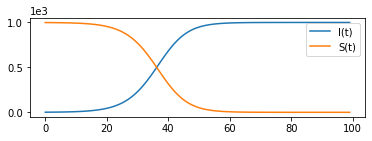

In [5]:
infection(S, I, N)
figure = plt.figure()

figure.add_subplot(211)
inf_line, =plt.plot(inf, label='I(t)')

sus_line, = plt.plot(sus, label='S(t)')
plt.legend(handles=[inf_line, sus_line])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# SIR - model

In [9]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [10]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [11]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

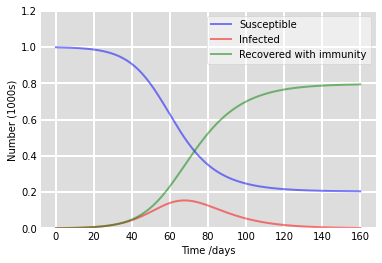

In [12]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# SEIR - model

In [16]:
# parameter values
R0 = 4
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

In [17]:
alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

In [18]:
# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

In [19]:
t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

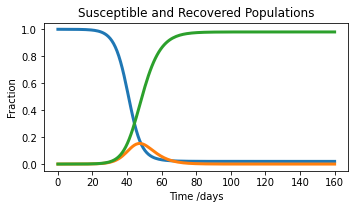

In [20]:
plotdata(t, s, i, e)